## Iimport Library

In [25]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from prediksi import calc, predict, Forecast, error
from decomposed import Decomposed

## Load Data

In [26]:
df = pd.read_excel("Global Superstore f.xls")
furniture = df.loc[df['Category'] == 'Furniture']

## Data Preprocessing

In [27]:
# Jumlahkan nilai sales dan kelompokan berdasarkan tanggal yang sama
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

## Indexing Time Series Data

In [28]:
# Merubah index dataframe menjadi nilai kolom 'Order Date'
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2011-01-07', '2011-01-08', '2011-01-11', '2011-01-12',
               '2011-01-14', '2011-01-15', '2011-01-17', '2011-01-20',
               '2011-01-21', '2011-01-22',
               ...
               '2014-12-19', '2014-12-20', '2014-12-22', '2014-12-23',
               '2014-12-24', '2014-12-25', '2014-12-26', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=890, freq=None)

## Resample Data

In [29]:
# Mencari rata-rata data berdasarkan parameter resample
# 'B' = business day, 'MS' = Month Start, 'Y' = Year, 'D' = 'Year', dll
y = furniture['Sales'].resample('M').mean()

## Visualilasi Data

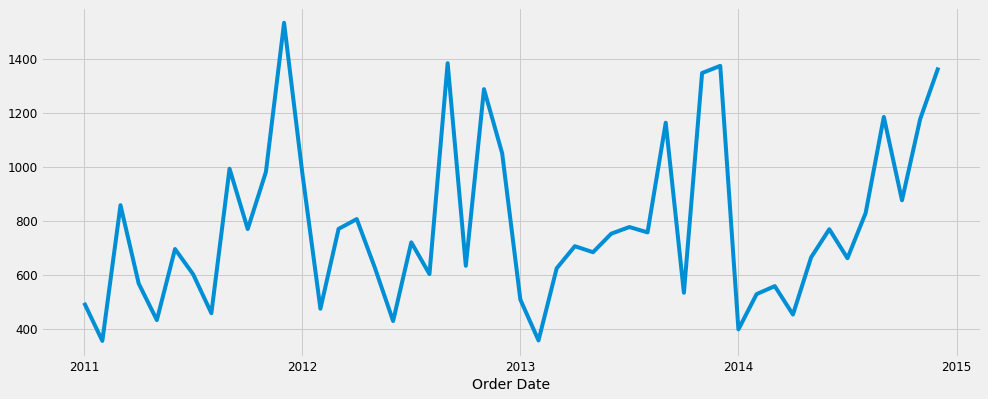

In [30]:
y.plot(figsize=(15, 6))
plt.show()

## Plotting Trend dan Seasonal

<function matplotlib.pyplot.show(*args, **kw)>

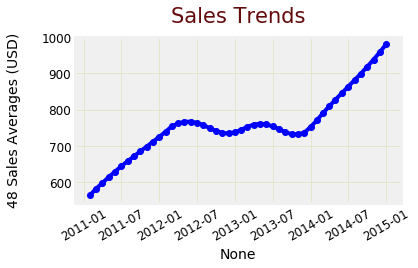

In [31]:
Decomposed.trend(y, 12,len(y))

<function matplotlib.pyplot.show(*args, **kw)>

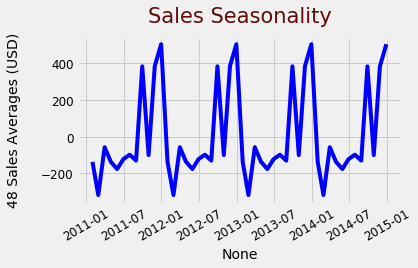

In [32]:
Decomposed.season(y, 12, len(y))

## ## Looping p, d, q, P, D, Q, s terbaik

In [33]:
summary, result = calc(y,12,10)

In [34]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -144.010
Date:                            Mon, 03 Dec 2018   AIC                            296.020
Time:                                    12:10:40   BIC                            300.384
Sample:                                01-31-2011   HQIC                           297.048
                                     - 12-31-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0486      0.285     -0.171      0.864      -0.607       0.510
ma.L1         -1.0000      0.364     -2.746      0.006      -1.714      -0.286
ar.S.L12      -0.0185      0.037     -0.506      0.613      -0.090       0.053
sigma2      2.721e+04   1.34e-05   2.03e+09      0.000    2.72e+04    2.72e+04
===================================================================================
Ljung-Box (Q):                       17.94   Jarque-Bera (JB):                 1.10
Prob(Q):                              0.65   Prob(JB):                         0.58
Heteroskedasticity (H):               0.74   Skew:                             0.49
Prob(H) (two-sided):                  0.70   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.63e+24. Standard errors may be unstable.
"""

## Prediksi

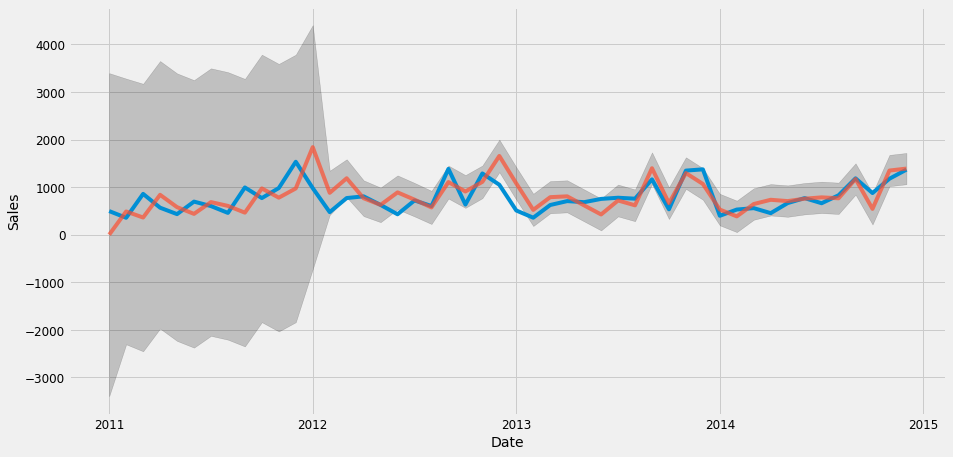

In [35]:
pred = predict(y, result)

In [36]:
mse, rmse, mape = error(y, pred)

In [37]:
print("MSE  : {} \nRMSE : {} \nMAPE : {}%".format(mse,rmse,mape))

MSE  : 87418.13 
RMSE : 295.67 
MAPE : 32.38%


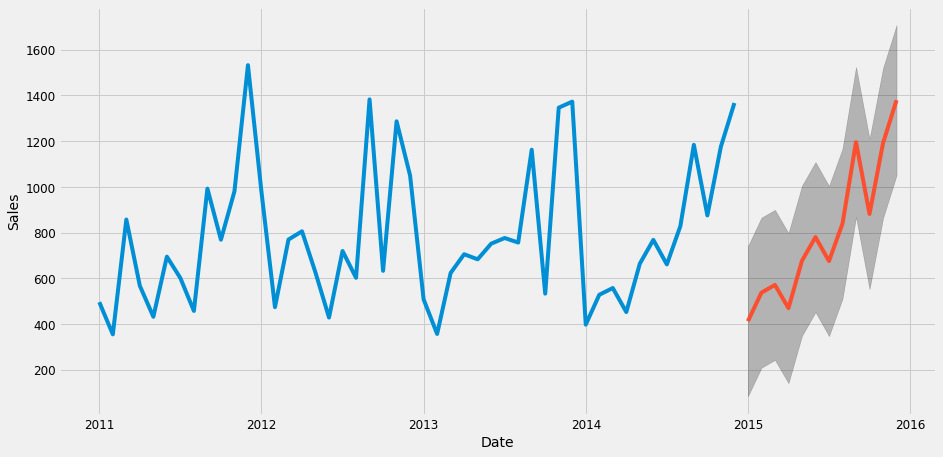

In [40]:
Forecast(y, result, 12)

In [14]:
p = d = q = range(0,2)

In [16]:
pdq = list(itertools.product(p, d, q))

In [17]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [19]:
lts = ()
for x in p:
    for y in d:
        for z in q:
            lts.append([x,y,z])

In [20]:
lts

[[0, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 1],
 [1, 0, 0],
 [1, 0, 1],
 [1, 1, 0],
 [1, 1, 1]]